# Fake and Real News Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
true=pd.read_csv("true.csv")

In [3]:
fake=pd.read_csv("fake.csv")

In [4]:
len(fake),len(true)

(23481, 21417)

In [5]:
true["category"]=1
fake["category"]=0

In [6]:
data=pd.concat([true,fake])

In [7]:
data["category"].value_counts()

0    23481
1    21417
Name: category, dtype: int64

In [8]:
data.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
data.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


# Data Visualization

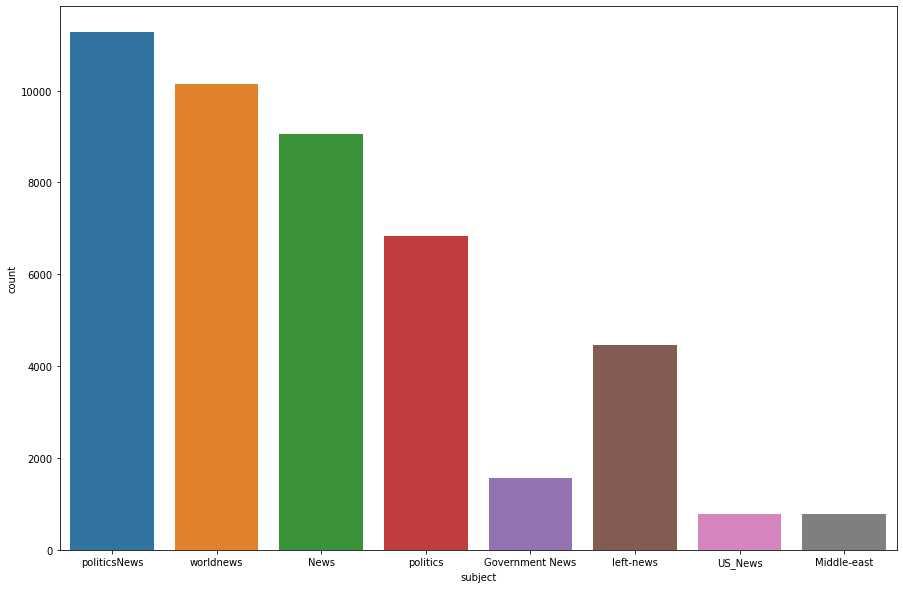

In [17]:
plt.figure(figsize =(15,10))
sb.countplot(data['subject'])

In [18]:

data['fulltext'] = data.title + ' ' + data.text
data.drop(['title','text'], axis=1, inplace=True)

In [20]:
final = data[['fulltext', 'category']]
final = data.reset_index()
final.drop(['index'], axis=1, inplace=True)


#  Data Preprocessing

## Data Cleaning

.Removing the repeated data.

.Removing Stop-words

.Remove any punctuations or limited set of special characters like , or . or # etc.

.Snowball Stemming the word

.Convert the word to lowercase.

In [21]:
import re
i=0;
for sent in final['fulltext'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1; 

3632
Trump budget wants to halve oil stockpile, open Arctic refuge to drilling WASHINGTON (Reuters) - U.S. President Donald Trump’s White House wants to sell half of the nation’s emergency oil stockpile and open the Alaska National Wildlife Refuge to drilling as part of plans to balance the budget over the next 10 years, documents by the administration showed. The White House budget, which will be delivered to Congress on Tuesday, is meant as a proposal and may not take effect in its current form. But it reveals the administration’s policy hopes, which include ramping up American energy output.    The U.S. Strategic Petroleum Reserve, the world’s largest, holds about 688 million barrels of crude oil in heavily guarded underground caverns in Louisiana and Texas. Congress created it in 1975 after the Arab oil embargo caused fears of long-term motor fuel price spikes that would harm the U.S. economy.  The Trump budget proposes to start selling SPR oil in fiscal year 2018, which begins on 

In [22]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stop = set(stopwords.words('english')) 
sno = nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#.|,|)|(|\|/]',r'',sentence)
    
    return  cleaned
print(stop)


{"didn't", 'when', 'not', "couldn't", 'with', 'm', 'be', 'will', 'didn', 'himself', 'each', 're', 'or', 'his', 'into', 'yourselves', "you're", 'all', 'are', 'yours', 'an', 'who', "it's", 'and', 'ma', 'doing', "aren't", 'had', 'wasn', 'if', 'few', 'shan', 'because', 'her', 'over', 'them', 'won', 'here', 'so', 'through', 'is', 've', "don't", "shouldn't", "you've", 'whom', 'itself', "needn't", 'what', 'was', 's', 'more', 'were', 'only', 'theirs', 'she', 'to', 'ourselves', "mightn't", "won't", 'just', "shan't", "you'd", "she's", 'couldn', "doesn't", "weren't", 'during', 'before', 'll', 'mightn', "mustn't", 'about', 'y', 'then', 'once', "you'll", 'very', 'both', 'now', 'o', 'other', 'they', 'which', 'd', 'in', 'has', 'how', 'but', 'as', 'mustn', 'having', 'hadn', "haven't", 'themselves', 'up', 'this', 'don', 'we', 'shouldn', 'there', 'out', 'hasn', 'haven', 'ain', 'between', 'he', 'down', 'him', 'does', 'above', 'off', 'needn', 'did', 'you', 'the', 'any', 'than', 'until', 'for', 'should', '

In [23]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
import re
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['fulltext'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['category'].values)[i] == '1': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['category'].values)[i] == '0':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [24]:
final['CleanedText']=final_string
final.head(3)

,subject,date,category,fulltext,CleanedText
0,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...",b'budget fight loom republican flip fiscal scr...
1,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,b'militari accept transgend recruit pentagon w...
2,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...,b'senior republican let mueller job washington...


In [25]:
label=final["category"]

In [26]:
sample=final['CleanedText']

## Train and Test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sample, label, test_size=0.30, random_state=0)

In [28]:
from sklearn.metrics import accuracy_score
##from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import gensim
from gensim.models import Word2Vec, KeyedVectors
from sklearn.metrics import f1_score

## TFIDF Vectorizer

In [29]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)
X_test= tf_idf_vect.transform(X_test)

# Model Creation

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
# Creating alpha values in the range from 10^-4 to 10^4
neighbors = []
i = 0.0001
while(i<=10000):
    neighbors.append(np.round(i,3))
    i *= 3


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    bn = MultinomialNB(alpha = k)
    scores = cross_val_score(bn, X_train, Y_train, cv=10, scoring='f1_macro', n_jobs=-1)
    cv_scores.append(scores.mean())  
    
# determining best value of alpha
optimal_alpha = neighbors[cv_scores.index(max(cv_scores))]
print('\nThe optimal value of alpha is %.3f.' % optimal_alpha)


The optimal value of alpha is 0.001.


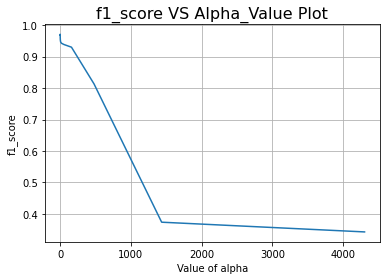



Alpha values :
 [0.0, 0.0, 0.001, 0.003, 0.008, 0.024, 0.073, 0.219, 0.656, 1.968, 5.905, 17.715, 53.144, 159.432, 478.297, 1434.891, 4304.672]

f1_score for each alpha value is :
  [0.96788 0.96788 0.97074 0.97068 0.9704  0.96932 0.96801 0.96406 0.95924
 0.95238 0.94629 0.94217 0.93815 0.92963 0.81307 0.37393 0.34306]


In [31]:
# plot f1_score vs alpha 
plt.plot(neighbors, cv_scores)
plt.xlabel('Value of alpha',size=10)
plt.ylabel('f1_score',size=10)
plt.title('f1_score VS Alpha_Value Plot',size=16)
plt.grid()
plt.show()

print("\n\nAlpha values :\n",neighbors)
print("\nf1_score for each alpha value is :\n ", np.round(cv_scores,5))

In [32]:
# ============================== Multinomial Naive Bayes with alpha = optimal_alpha ============================================
# instantiate learning model alpha = optimal_alpha
bn_optimal = MultinomialNB(alpha = optimal_alpha)

# fitting the model
bn_optimal.fit(X_train, Y_train)

# predict the response
predictions = bn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, predictions) * 100
print('\nThe Test Accuracy of the Multinomial naive Bayes classifier for alpha = %.3f is %f%%' % (optimal_alpha, acc))

# Variables that will be used for  making table in Conclusion part of this assignment
tfidf_multinomial_alpha = optimal_alpha
tfidf_multinomial_train_acc = max(cv_scores)*100
tfidf_multinomial_test_acc = acc


The Test Accuracy of the Multinomial naive Bayes classifier for alpha = 0.001 is 97.364514%


In [33]:
bn_optimal.classes_

array([0, 1])

In [34]:
# Now we can find log probabilities of different features for both the classes
class_features = bn_optimal.feature_log_prob_

#  row_0 is for 'Fake' class and row_1 is for 'True' class
Fake_features = class_features[0]
True_features = class_features[1]

# Getting all feature names
feature_names = tf_idf_vect.get_feature_names()

# Sorting 'Fake_features' and 'True_features' in descending order using argsort() function
sorted_Fake_features = np.argsort(Fake_features)[::-1]
sorted_True_features = np.argsort(True_features)[::-1]

print("Top 20 Important Features and their log probabilities For Fake News :\n\n")
for i in list(sorted_Fake_features[0:20]):
    print("%s\t -->\t%f  "%(feature_names[i],Fake_features[i]))
    
print("\n\nTop 20 Important Features and their log probabilities For true news :\n\n")
for i in list(sorted_True_features[0:20]):
    print("%s\t -->\t%f  "%(feature_names[i],True_features[i]))

Top 20 Important Features and their log probabilities For Fake News :


trump	 -->	-6.123435  
clinton	 -->	-7.115360  
obama	 -->	-7.151675  
peopl	 -->	-7.247980  
presid	 -->	-7.248913  
hillari	 -->	-7.252067  
like	 -->	-7.373698  
one	 -->	-7.390165  
video	 -->	-7.469118  
state	 -->	-7.479574  
republican	 -->	-7.479886  
said	 -->	-7.493187  
would	 -->	-7.498999  
american	 -->	-7.508333  
get	 -->	-7.509139  
donald	 -->	-7.522215  
say	 -->	-7.546226  
imag	 -->	-7.564692  
donald trump	 -->	-7.577293  
time	 -->	-7.583902  


Top 20 Important Features and their log probabilities For true news :


said	 -->	-6.092572  
trump	 -->	-6.542346  
state	 -->	-6.856171  
reuter	 -->	-6.891740  
would	 -->	-7.034373  
presid	 -->	-7.061980  
republican	 -->	-7.068810  
senat	 -->	-7.111842  
hous	 -->	-7.121106  
govern	 -->	-7.214973  
unit	 -->	-7.334579  
democrat	 -->	-7.339002  
north	 -->	-7.368542  
elect	 -->	-7.388390  
offici	 -->	-7.397545  
washington	 -->	-7.412174  
p

In [35]:

MNB_f1 = round(f1_score(Y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(Y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

Accuracy :  97.36  %
f1_score :  0.974


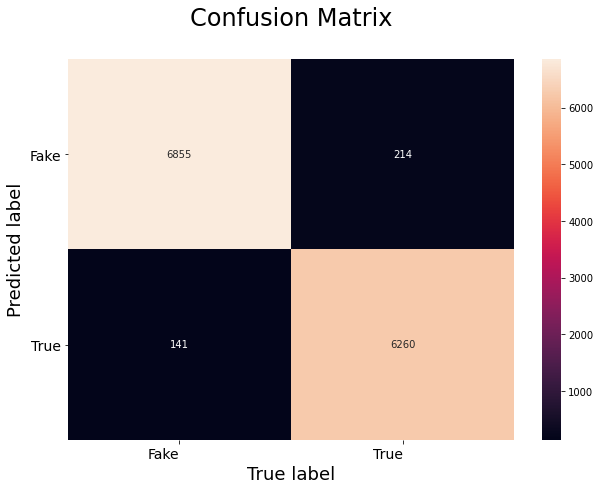

In [36]:
# Code for drawing seaborn heatmaps
class_names = ['Fake','True']
df_heatmap = pd.DataFrame(confusion_matrix(Y_test, predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sb.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# Ensemble models



## Random Forest Classifier

In [37]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

depths=[1,5,50,100]
estimators=[1,5,50,100]
clf = RandomForestClassifier()

params = {'max_depth' : depths,
          'n_estimators':estimators  
          }

grid = GridSearchCV(estimator = clf,param_grid=params ,cv = 2,n_jobs = 3,scoring='roc_auc')
grid.fit(X_train, Y_train)
print("best depth = ", grid.best_params_)
print("AUC value on train data = ", grid.best_score_*100)
a1 = grid.best_params_

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
best depth =  {'max_depth': 100, 'n_estimators': 100}
AUC value on train data =  99.67527690992635


In [38]:

optimal_depth1 = a1.get('max_depth')
optimal_bases1 = a1.get('n_estimators')

In [39]:
clf = RandomForestClassifier(max_depth=optimal_depth1,n_estimators=optimal_bases1) 

clf.fit(X_train,Y_train)

pred = clf.predict(X_test)



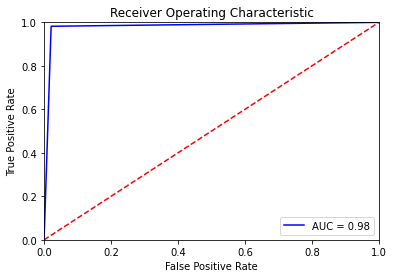

Best AUC value
0.9804780556086634


In [40]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Best AUC value")
print(roc_auc)

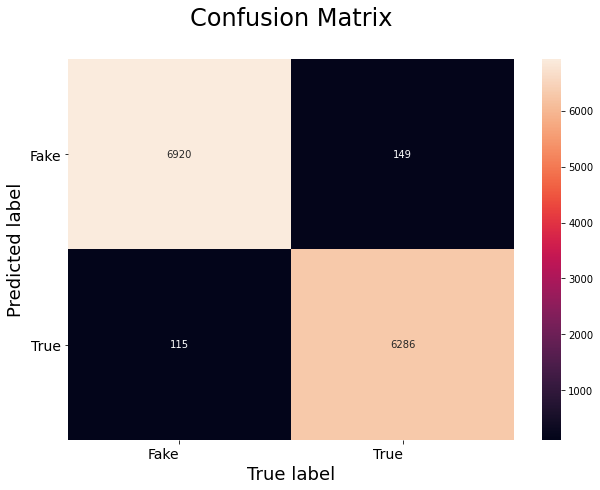

In [42]:
# Code for drawing seaborn heatmaps
class_names = ['Fake','True']
df_heatmap = pd.DataFrame(confusion_matrix(Y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sb.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
acc1 = accuracy_score(Y_test, pred) * 100
pre1 = precision_score(Y_test, pred) * 100
rec1 = recall_score(Y_test, pred) * 100
f11 = f1_score(Y_test, pred) * 100
print('\nAccuracy=%f%%' % (acc1))
print('\nprecision=%f%%' % (pre1))
print('\nrecall=%f%%' % (rec1))
print('\nF1-Score=%f%%' % (f11))


Accuracy=98.040089%

precision=97.684538%

recall=98.203406%

F1-Score=97.943285%


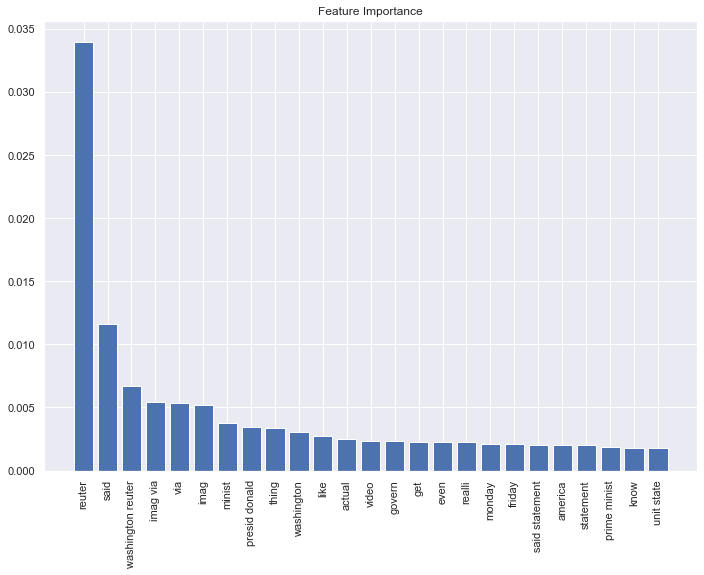

In [46]:
# Calculate feature importances from decision trees
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1][:25]

# Rearrange feature names so they match the sorted feature importances
names = tf_idf_vect.get_feature_names()

sb.set(rc={'figure.figsize':(11.7,8.27)})

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(25), importances[indices])

# Add feature names as x-axis labels
names = np.array(names)
plt.xticks(range(25), names[indices], rotation=90)

# Show plot
plt.show()
# uni_gram.get_feature_names()

In [47]:
df=names[indices]
print(df)

['reuter' 'said' 'washington reuter' 'imag via' 'via' 'imag' 'minist'
 'presid donald' 'thing' 'washington' 'like' 'actual' 'video' 'govern'
 'get' 'even' 'realli' 'monday' 'friday' 'said statement' 'america'
 'statement' 'prime minist' 'know' 'unit state']


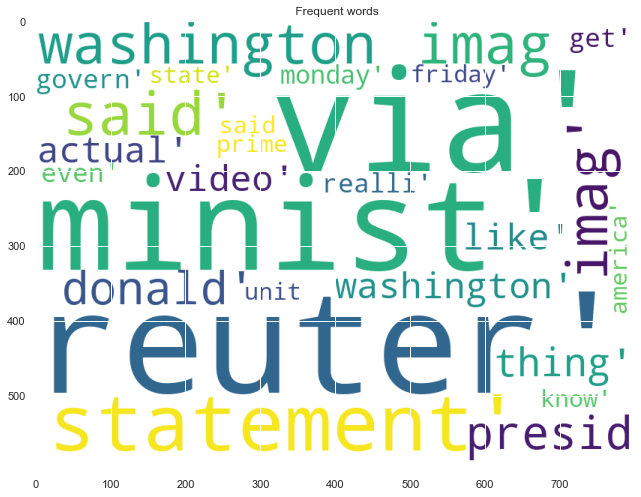

In [50]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 600,background_color ='white').generate(str(df))
plt.imshow(wordcloud)
plt.title(" Frequent words")
plt.show()

# Thank You 